In [1]:
### If Google Colab
!git config --global user.email "sjs.shamsi@gmail.com"
!git config --global user.name "SJShamsi"

from google.colab import drive
drive.mount('/content/drive')

Thesis_Files = '/content/drive/MyDrive/Thesis_Files/'

Mounted at /content/drive


In [2]:
import sys
# sys.path.insert(0, '/home/shoaib/Thesis/dmdt_Analysis/')
sys.path.insert(0, Thesis_Files + 'Thesis/dmdt_Analysis/')

from dmdt_functions import *

In [3]:
import pandas as pd
import numpy as np
from scipy.integrate import simpson

import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')
plt.style.use('seaborn-v0_8-colorblind')

In [4]:
# filtered_lightcurves_file = "/home/shoaib/PSChallenge/filtered_lightcurves.parquet"
filtered_lightcurves_file = Thesis_Files + "filtered_lightcurves.parquet"

In [5]:
all_lightcurves = pd.read_parquet(filtered_lightcurves_file)
all_lightcurves = all_lightcurves[all_lightcurves['type'].isin(['Q', 'QR', 'QX'])]

In [6]:
### Sampling to save disk space
fraction = 0.5
all_names = all_lightcurves['name'].unique()
sampled_names = np.random.choice(all_names, size=int(len(all_names) * fraction), replace=False)
all_lightcurves = all_lightcurves[all_lightcurves['name'].isin(sampled_names)]

In [7]:
grouped = all_lightcurves.groupby(['name', 'band'])

small_dt_dict_list = []
num_total_groups = len(grouped)
count = 0

for (name, band), df in grouped:
    count += 1
    print(f'{count}\t/ {num_total_groups} objects in their bands done.')

    df = df.sort_values(by='mjd')
    mags, times = df['mag'].to_numpy(), df['mjd'].to_numpy()
    dmags, dtimes = return_dms_dts(magnitudes=mags, times=times, log_dt=False)
    object_type = df['type'].iloc[0]

    num_small_dts = (dtimes < 0.0069).sum()

    if num_small_dts >= 1:
        smallest_dt = dtimes.min()
        small_dt_dict_list.append({'name': name, 'band': band, 'type': object_type, 'num_small_dts': num_small_dts, 'smallest_dt': smallest_dt})

Streaming output truncated to the last 5000 lines.
18306	/ 23305 objects in their bands done.
18307	/ 23305 objects in their bands done.
18308	/ 23305 objects in their bands done.
18309	/ 23305 objects in their bands done.
18310	/ 23305 objects in their bands done.
18311	/ 23305 objects in their bands done.
18312	/ 23305 objects in their bands done.
18313	/ 23305 objects in their bands done.
18314	/ 23305 objects in their bands done.
18315	/ 23305 objects in their bands done.
18316	/ 23305 objects in their bands done.
18317	/ 23305 objects in their bands done.
18318	/ 23305 objects in their bands done.
18319	/ 23305 objects in their bands done.
18320	/ 23305 objects in their bands done.
18321	/ 23305 objects in their bands done.
18322	/ 23305 objects in their bands done.
18323	/ 23305 objects in their bands done.
18324	/ 23305 objects in their bands done.
18325	/ 23305 objects in their bands done.
18326	/ 23305 objects in their bands done.
18327	/ 23305 objects in their bands done.
183

In [8]:
small_dt_df = pd.DataFrame(small_dt_dict_list)
small_dt_df = small_dt_df.sort_values(by=['smallest_dt', 'num_small_dts'], ascending=[True, False], ignore_index=True)
small_dt_df

,name,band,type,num_small_dts,smallest_dt
0,CF 1549+48#46,r,Q,6296,-0.000000
1,CF 1549+48#46,g,Q,5178,-0.000000
2,H 1340#04,g,Q,1568,-0.000000
3,H 1340#04,r,Q,1376,-0.000000
4,H 1420#24,r,Q,1076,-0.000000
...,...,...,...,...,...
22521,SDSS J113612.66+065548.7,g,Q,1,0.006401
22522,UM 425,g,QX,1,0.006401
22523,SDSS J103000.85+220602.9,g,Q,1,0.006482
22524,SDSS J103456.52+222413.4,g,Q,1,0.006482


In [12]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=small_dt_df)

https://docs.google.com/spreadsheets/d/1vJ0-7BgNZ8CP8DnWqB6ngVvocQFzlAkGalB-eeSoQCA#gid=0


In [11]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=small_dt_df)

https://docs.google.com/spreadsheets/d/1ldchf-Mfq68ciaG4ksXKDx1hssulRjZi0soIlmTuhRo#gid=0


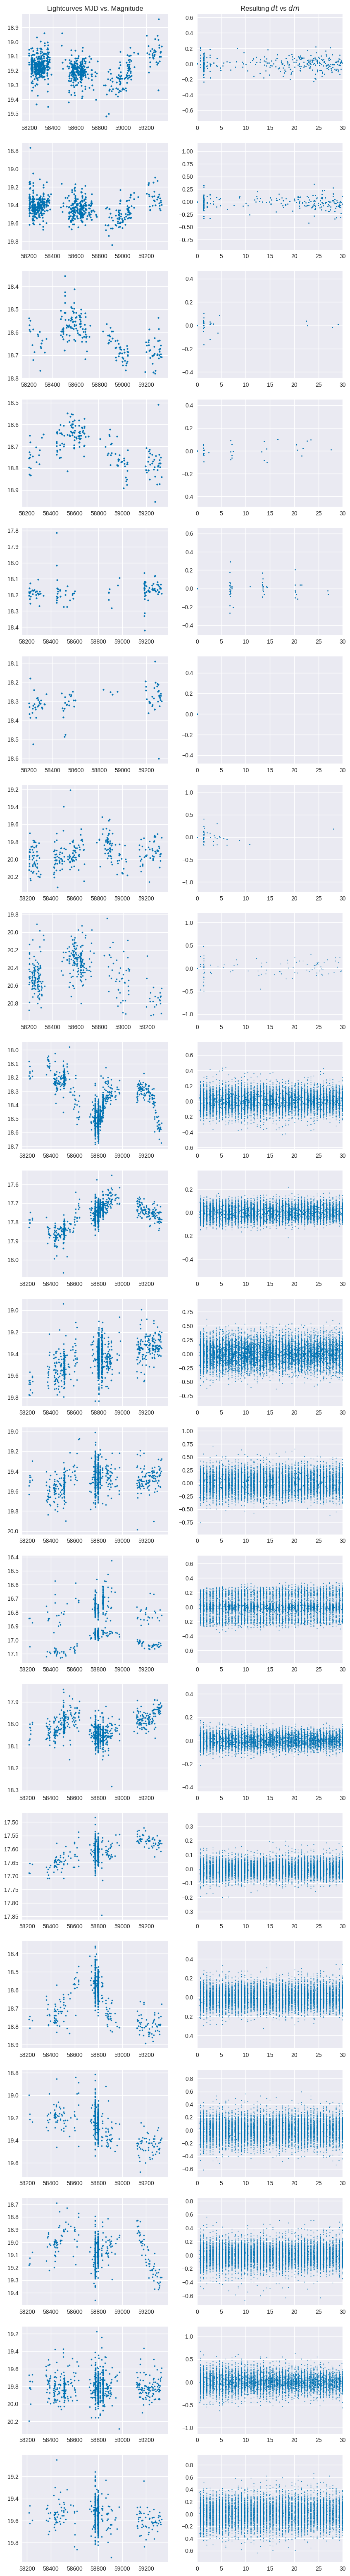

In [14]:
nrows = 20

fig, axs = plt.subplots(nrows=nrows, ncols=2, figsize=(10, 4 * nrows))

axs[0, 0].set_title('Lightcurves MJD vs. Magnitude')
axs[0, 1].set_title('Resulting $dt$ vs $dm$')

for i, row in small_dt_df.iterrows():
    df = all_lightcurves[(all_lightcurves['name'] == row['name']) & (all_lightcurves['band'] == row['band'])]
    df = df.sort_values(by='mjd')
    mags, times = df['mag'].to_numpy(), df['mjd'].to_numpy()
    dmags, dtimes = return_dms_dts(magnitudes=mags, times=times, log_dt=False)

    axs[i, 0].scatter(times, mags, s=5)
    axs[i, 0].invert_yaxis()

    axs[i, 1].scatter(dtimes * 24 * 60, dmags, s=1)
    axs[i, 1].set_xlim(0, 30)

    if i == nrows - 1:
        break

<Axes: >

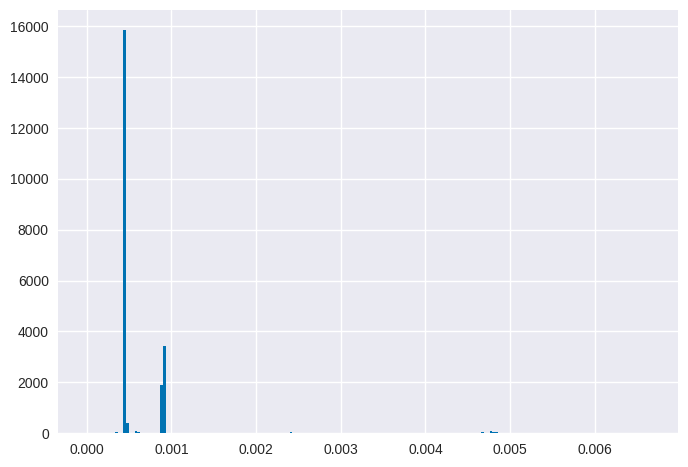

In [10]:
small_dt_df['smallest_dt'].hist(bins=200)